https://www.kaggle.com/luigisaetta/physionet2017ecg/tasks?taskId=2406                   
About this file             
Each row is a different ECG.               
The last two columns contain the identifier of the original file and the label          

data is given in Volt             
Every row contains data from one ECG (2000 point, 250 Hz). Each row has a label (0, 3).            
develop a model to classify each ECG in one of the 4 classes. 어떤 ECG 어느 label에 속하는가     

In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

from sklearn.preprocessing import StandardScaler, MinMaxScaler # scalers

from sklearn.decomposition import PCA  # 2d dimensional reduction
from sklearn.cluster import KMeans     # clustering

from sklearn.model_selection import train_test_split

from sklearn.neural_network import MLPClassifier  # classifiers
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

from sklearn.metrics import accuracy_score      # check score



In [13]:
data = pd.read_csv('physionet2017.csv')
data

,0,1,2,3,4,5,6,7,8,9,...,1992,1993,1994,1995,1996,1997,1998,1999,name,label
0,0.035032,0.037155,0.044586,0.063694,0.076433,0.085987,0.089172,0.083864,0.072187,0.061571,...,0.008493,0.000000,-0.007431,-0.012739,-0.015924,-0.019108,-0.023355,-0.022293,A00/A00001,0
1,-0.035288,-0.032573,-0.030945,-0.029859,-0.031488,-0.034202,-0.037459,-0.040717,-0.043974,-0.047231,...,-0.001629,-0.001086,-0.000543,-0.000543,0.000000,0.000000,0.000543,0.001086,A00/A00002,0
2,-0.303922,-0.261438,-0.222222,-0.192810,-0.176471,-0.163399,-0.147059,-0.130719,-0.117647,-0.107843,...,-0.346405,-0.339869,-0.323529,-0.297386,-0.264706,-0.209150,-0.117647,-0.065359,A00/A00003,0
3,0.109467,0.117604,0.128698,0.142012,0.153107,0.161982,0.170118,0.176036,0.181213,0.184911,...,0.780325,0.640533,0.467456,0.298077,0.165680,0.085799,0.012574,0.013314,A00/A00004,1
4,-0.019856,-0.017148,-0.014440,-0.011733,-0.009928,-0.008123,-0.006318,-0.004513,-0.003610,-0.001805,...,-0.306859,-0.260830,-0.214801,-0.168773,-0.124549,-0.083935,-0.051444,0.000000,A00/A00005,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8523,0.151235,0.148148,0.145062,0.145062,0.141975,0.138889,0.135802,0.132716,0.129630,0.126543,...,0.182099,0.179012,0.172840,0.166667,0.160494,0.151235,0.138889,0.108025,A08/A08524,0
8524,0.502273,0.518182,0.536364,0.556818,0.572727,0.588636,0.602273,0.615909,0.631818,0.654545,...,-0.309091,-0.311364,-0.309091,-0.288636,-0.261364,-0.218182,-0.175000,-0.134091,A08/A08525,2
8525,-0.124053,-0.113636,-0.107955,-0.105114,-0.101326,-0.096591,-0.092803,-0.096591,-0.103220,-0.107955,...,-0.407197,-0.509470,-0.541667,-0.511364,-0.426136,-0.296402,-0.163826,-0.049242,A08/A08526,0
8526,-0.248731,-0.253807,-0.260575,-0.267343,-0.272420,-0.277496,-0.282572,-0.285956,-0.287648,-0.285956,...,-0.126904,-0.120135,-0.115059,-0.109983,-0.101523,-0.091371,-0.074450,-0.060914,A08/A08527,0


# Data analisys

In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8528 entries, 0 to 8527
Columns: 2002 entries, 0 to label
dtypes: float64(2000), int64(1), object(1)
memory usage: 130.3+ MB


In [15]:
nulls = []
for col in data.columns:
    nulls.append(data[col].isnull().sum())
print(nulls)

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 

<AxesSubplot:>

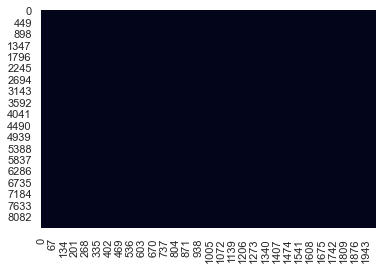

In [16]:
sns.heatmap(data.isnull(), cbar = False)

data is clean (no NaNs)

In [17]:
data.select_dtypes('object').columns

Index(['name'], dtype='object')

Unlabeled data ==> Unsupervised learning      

# label에 대한 DataVisualization

In [10]:
dvis = data.drop('name', axis =1).copy()
dvis.shape

(8528, 2001)

In [29]:
dvis.groupby('label').size()

label
0    5076
1     758
2    2415
3     279
dtype: int64

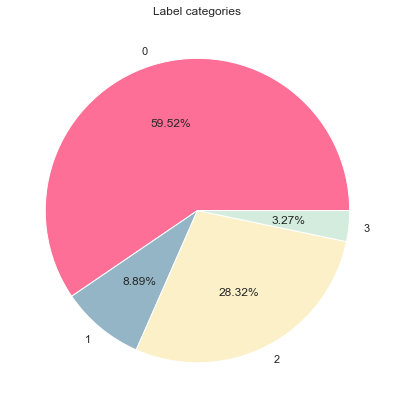

In [36]:
plt.figure(figsize = (7,7))
plt.title('Label categories')
plt.pie(dvis.groupby('label').size(), autopct='%.2f%%', 
       labels = [0,1,2,3],
       colors=['#FD6F96','#93B5C6','#FCF0C8','#D4ECDD'])
plt.show()

In [49]:
# get each category(0,1,2,3) indexes for using in visualization for each categs

label_0 = dvis[dvis['label']==0].sample().iloc[0:1,-1]
label_1 = dvis[dvis['label']==1].sample().iloc[0:1,-1]
label_2 = dvis[dvis['label']==2].sample().iloc[0:1,-1]
label_3 = dvis[dvis['label']==3].sample().iloc[0:1,-1]
print(label_0)
print(label_1)
print(label_2)
print(label_3) # raw [4388,5052,1212,6511]'s labels are (0,1,2,3)

4388    0
Name: label, dtype: int64
5052    1
Name: label, dtype: int64
1212    2
Name: label, dtype: int64
6511    3
Name: label, dtype: int64


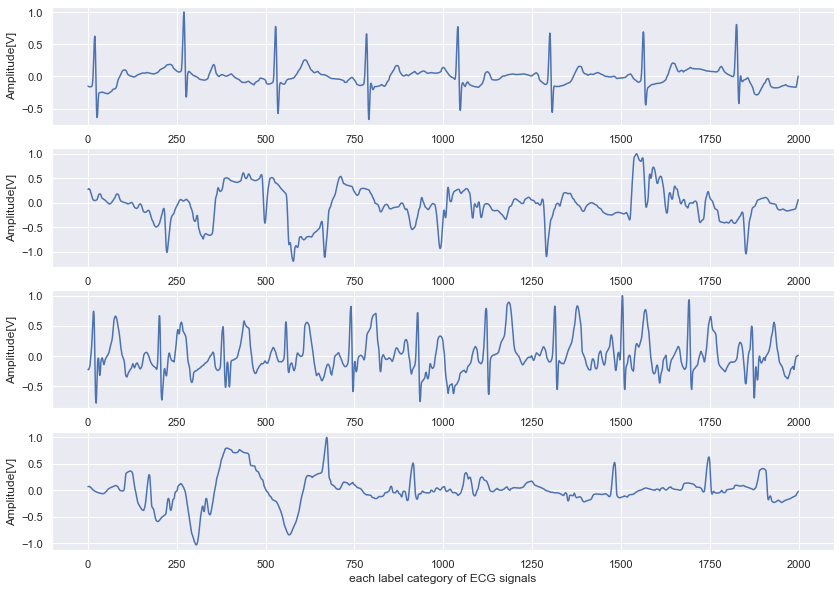

In [11]:
labels = [4388,5052,1212,6511]


fig, axes = plt.subplots(4,1,figsize = (14,10))

for i, ax in enumerate(axes.flatten()):
    
    y = dvis.iloc[labels[i],0:-1].values
    ax.plot(y)
    axes[i].set_ylabel('Amplitude[V]')
    plt.xlabel('each label category of ECG signals')
# plt.savefig('ECG_signals.pdf')
plt.show()

# Preprocessing

In [12]:
def preprocessing_func(df):
    df = df.copy()
    
    # drop uninformative feature
    df = df.drop('name', axis = 1)
    
    X = df.drop('label', axis = 1)
    y = df.label
    
    # Scaling
    X = pd.DataFrame(MinMaxScaler().fit_transform(X), columns = X.columns)
    
    return X,y

In [13]:
X,y = preprocessing_func(data)
X.head()

,0,1,2,3,4,5,6,7,8,9,...,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999
0,0.912982,0.895201,0.859202,0.808543,0.836176,0.860368,0.872862,0.879974,0.873928,0.856317,...,0.921878,0.906007,0.879196,0.880258,0.889934,0.892965,0.891524,0.880800,0.853687,0.819025
1,0.906641,0.887611,0.848071,0.789413,0.817033,0.842007,0.855186,0.863652,0.858144,0.839658,...,0.918465,0.903812,0.877962,0.880128,0.890687,0.894254,0.893224,0.883035,0.857168,0.823544
2,0.882416,0.862701,0.819883,0.756092,0.791315,0.822269,0.839887,0.851861,0.848133,0.830378,...,0.891964,0.871470,0.835955,0.839561,0.855399,0.862881,0.864960,0.858572,0.839951,0.810702
3,0.919694,0.903957,0.871598,0.824557,0.849776,0.871977,0.884160,0.892050,0.888742,0.875202,...,0.987384,0.985242,0.973235,0.956957,0.941817,0.925815,0.910915,0.893071,0.858920,0.825907
4,0.908032,0.889290,0.850504,0.793119,0.820857,0.845991,0.859533,0.868395,0.863628,0.846614,...,0.887764,0.870740,0.840773,0.849025,0.867278,0.876474,0.879926,0.873218,0.849595,0.823334


# PCA - Principal Component Analisys
Dimensional Reduction - needed for visualizing the data in 2D plot

In [14]:
pca = PCA(n_components=2)
X2D = pca.fit_transform(X)
df_X2D = pd.DataFrame(X2D, columns = ['PC1','PC2'])
df_X2D

,PC1,PC2
0,-0.011006,0.046550
1,-0.075404,0.073674
2,-0.560746,0.241885
3,-0.216540,0.126183
4,0.020916,-0.088544
...,...,...
8523,-0.051399,-0.049779
8524,0.155504,0.490447
8525,-0.169967,-0.005854
8526,0.138336,-0.290180


# KMeans - cluster

In [15]:
km = KMeans(n_clusters=4)
km.fit(X)

KMeans(n_clusters=4)

In [16]:
df_X2D['clusters'] = km.labels_
df_X2D.sample(5)

,PC1,PC2,clusters
7574,-0.223156,-0.049955,0
1807,0.151698,-0.037043,0
4808,-0.021288,-0.019287,0
6185,-0.571565,0.176672,1
5496,0.091243,0.017403,0


In [17]:
df_X2D.clusters.value_counts()

0    6828
1     688
2     574
3     438
Name: clusters, dtype: int64

In [18]:
fn_centroid = pca.transform(km.cluster_centers_)
fn_centroid

array([[ 0.00307831,  0.000865  ],
       [-0.41397156, -0.16610243],
       [-0.00611029,  0.36772268],
       [ 0.61027633, -0.23447613]])

C:\Users\admin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


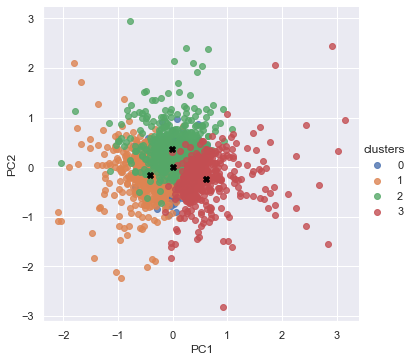

In [19]:
sns.lmplot('PC1','PC2',data = df_X2D, hue = 'clusters', fit_reg=False)
plt.scatter(fn_centroid[:,0], fn_centroid[:,1], marker='X', c = 'black')

# Training

In [20]:
X_train,X_test, y_train, y_test = train_test_split(X,y, train_size = .8, random_state=0)
X_train.shape

(6822, 2000)

In [21]:
models = {
    '      Neural network' : MLPClassifier(),
    'KNeighborsClassifier' : KNeighborsClassifier(n_neighbors=6),
    '          GaussianNB' : GaussianNB()
}

for name, model in models.items():
    model.fit(X_train, y_train)
    print(name, ' is trained')

      Neural network  is trained
KNeighborsClassifier  is trained
          GaussianNB  is trained


In [22]:
for name, model in models.items():
    y_pred = model.predict(X_test)
    score = accuracy_score(y_pred, y_test)
    print(name," 's accuracy score is {:.2f}%".format(score*100))

      Neural network  's accuracy score is 60.32%
KNeighborsClassifier  's accuracy score is 58.73%
          GaussianNB  's accuracy score is 15.71%


In [23]:
models2  = {
    'DecisionTreeClassifier':DecisionTreeClassifier(max_depth = 10),
    'RandomForestClassifier':RandomForestClassifier(n_estimators=100),
}

for name, model in models2.items():
    model.fit(X_train,y_train)
    print(name,"'s trained!")



DecisionTreeClassifier 's trained!
RandomForestClassifier 's trained!


In [24]:
for name, model in models2.items():
    y_pred = model.predict(X_test)
    score = accuracy_score(y_pred, y_test)
    print(name," 's accuracy score is {:.2f}%".format(score*100))

DecisionTreeClassifier  's accuracy score is 55.69%
RandomForestClassifier  's accuracy score is 60.61%


# Test Results

# TRY 1 - without scaling = Original data
    *  train_size = .8      
    *  df_X2D.clusters.value_counts() - 
           3    6969
           2     977
           0     306
           1     276
      
Neural network's       accuracy score is 53.34%         
KNeighborsClassifier's accuracy score is 59.03%       
GaussianNB's accuracy score is 15.71%

<img src = 'withoutScalingPCA.png' alt = 'without scaling pca' width="500" height="500">

# TRY 2 - StandardScaled (X)
    *  train_size = .8      
    *  df_X2D.clusters.value_counts() - 
            1    6887
            3     801
            2     442
            0     398

Neural network's       accuracy score is 50.70%         
KNeighborsClassifier's accuracy score is 59.14%       
GaussianNB's accuracy score is 15.71%       
DecisionTreeClassifier  's accuracy score is 55.33%        
RandomForestClassifier  's accuracy score is 60.55%   

<img src = 'StandardScalingPCA.png' alt = 'Standard Scaling pca' width = '500' height = '500'>

# TRY 3 - MinMaxScaled (X)
    *  train_size = .8      
    *  df_X2D.clusters.value_counts() - 
            0    6828
            1     688
            2     574
            3     438
            
Neural network's       accuracy score is 60.32%         
KNeighborsClassifier's accuracy score is 58.73%       
GaussianNB's accuracy score is 15.71%       
DecisionTreeClassifier  's accuracy score is 55.69%        
RandomForestClassifier  's accuracy score is 60.61%   <---- Max Accuracy Score 

<img src = 'withoutScalingPCA.png' alt = 'MinMax Scaling PCA' width = '500' height = '500'>

<h3><em>  <a href = 'ECG_signals.pdf'>see</a> ECG signals<em></h3>